In [118]:
import pandas as pd

In [119]:
df = pd.read_csv("data_preprocessed.csv")
df.head()

,customer_id,age,gender_cd,region_size,foreign_flg,entrepreneur_flg,auto_flg,traveler_flg,partnership_flg,child_amt,...,emp_age,emp_gender_cd,emp_children_cnt,emp_work_months_cnt,emp_citizenship_country_cd,emp_marital_status_cd,day_of_week,is_holiday,region_size_numeric,approval_flag
0,422206773,58.0,0,No,NaN,NaN,NaN,NaN,NaN,NaN,...,30,W,NaN,1,NaN,NaN,1,0,0,0
1,348648289,44.0,1,rural,0.0,0.0,0.0,0.0,1.0,1.0,...,36,W,NaN,2,RUS,NaN,2,0,4,0
2,345496995,23.0,0,town,0.0,0.0,1.0,0.0,1.0,0.0,...,52,W,NaN,6,NaN,NaN,4,0,1,1
3,138498254,30.0,1,No,NaN,NaN,NaN,NaN,NaN,NaN,...,51,W,NaN,7,NaN,NaN,0,0,0,0
4,64946855,31.0,1,town,0.0,0.0,0.0,0.0,1.0,0.0,...,43,W,NaN,6,RUS,UNM,4,0,1,0


In [120]:
df.shape

(15567, 32)

In [121]:
mean_talk = df["state_talk_time_sec"].mean()
df["is_long"] = df["state_talk_time_sec"] > mean_talk
df.groupby("approval_flag")["is_long"].mean().reset_index()

,approval_flag,is_long
0,0,0.285714
1,1,0.877843


In [122]:
df.groupby("approval_flag")["state_talk_time_sec"].mean().reset_index()

,approval_flag,state_talk_time_sec
0,0,56.249715
1,1,148.852502


Зависимость длительности звонка и успешности

In [123]:
from scipy.stats import shapiro, mannwhitneyu

normal_calls = df[df["state_talk_time_sec"] <= mean_talk]["approval_flag"]
long_calls = df[df["state_talk_time_sec"] > mean_talk]["approval_flag"]

# Тест на нормальность
shapiro_norm = shapiro(normal_calls)
shapiro_long = shapiro(long_calls)

# Результаты теста Шапиро-Уилка
print(f"Статистика: {shapiro_norm.statistic}, p-значение: {shapiro_norm.pvalue}")

print(f"Статистика: {shapiro_long.statistic}, p-значение: {shapiro_long.pvalue}")

# Выполнение теста Манна-Уитни
u_stat, p_value_mw = mannwhitneyu(normal_calls, long_calls)

# Результаты теста
print("Тест Манна-Уитни:")
print(f"U-статистика: {u_stat}, p-значение: {p_value_mw}")

# Проверка на значимость
is_significant_mw = p_value_mw < 0.05
print("Значимость теста Манна-Уитни (p < 0.05):", is_significant_mw)

Статистика: 0.11269541542463701, p-значение: 1.0614919996074597e-112
Статистика: 0.5403348028584449, p-значение: 5.36437484802561e-80
Тест Манна-Уитни:
U-статистика: 20960578.0, p-значение: 0.0
Значимость теста Манна-Уитни (p < 0.05): True


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10208.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5359.
  res = hypotest_fun_out(*samples, **kwds)


Зависимость дня недели и успешности звонка

In [124]:
from scipy.stats import chi2_contingency

# Создание контингентной таблицы
contingency_table = pd.crosstab(df['is_holiday'], df['approval_flag'])

# Выполнение теста хи-квадрат
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Результаты теста
print("Тест хи-квадрат:")
print(f"Хи-квадрат статистика: {chi2_stat}")
print(f"p-значение: {p_value}")
print(f"Степени свободы: {dof}")
print("Ожидаемые частоты:")
print(expected)

# Проверка на значимость
is_significant_chi2 = p_value < 0.05
print("Значимость теста хи-квадрат (p < 0.05):", is_significant_chi2)

Тест хи-квадрат:
Хи-квадрат статистика: 4.176960817366622
p-значение: 0.040977120378438585
Степени свободы: 1
Ожидаемые частоты:
[[12635.74330314  1386.25669686]
 [ 1392.25669686   152.74330314]]
Значимость теста хи-квадрат (p < 0.05): True


In [125]:
df.groupby("approval_flag")["age"].mean()

approval_flag
0    37.885814
1    37.243015
Name: age, dtype: float64

Зависимость успешности звонка и возраста

In [126]:
from scipy.stats import shapiro, mannwhitneyu

success_age = df[df["approval_flag"] == 0]["age"]
unsuccess_age = df[df["approval_flag"] == 1]["age"]

# Тест на нормальность для праздничных разговоров
shapiro_holiday = shapiro(success_age)
shapiro_not_holiday = shapiro(unsuccess_age)

# Результаты теста Шапиро-Уилка
print("Тест Шапиро-Уилка для праздничных разговоров:")
print(f"Статистика: {shapiro_holiday.statistic}, p-значение: {shapiro_holiday.pvalue}")

print("\nТест Шапиро-Уилка для непраздничных разговоров:")
print(f"Статистика: {shapiro_not_holiday.statistic}, p-значение: {shapiro_not_holiday.pvalue}")

# Выполнение теста Манна-Уитни
u_stat, p_value_mw = mannwhitneyu(success_age, unsuccess_age)

# Результаты теста
print("Тест Манна-Уитни:")
print(f"U-статистика: {u_stat}, p-значение: {p_value_mw}")

# Проверка на значимость
is_significant_mw = p_value_mw < 0.05
print("Значимость теста Манна-Уитни (p < 0.05):", is_significant_mw)

Тест Шапиро-Уилка для праздничных разговоров:
Статистика: 0.9761516008993104, p-значение: 6.521632923447075e-43

Тест Шапиро-Уилка для непраздничных разговоров:
Статистика: 0.9792255058177661, p-значение: 3.992990531267659e-14
Тест Манна-Уитни:
U-статистика: 11044540.0, p-значение: 0.13510454317844786
Значимость теста Манна-Уитни (p < 0.05): False


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 14028.
  res = hypotest_fun_out(*samples, **kwds)


In [127]:
df["approval_flag"].value_counts()

approval_flag
0    14028
1     1539
Name: count, dtype: int64

In [128]:
df["bundle_nm"].isna().sum()

11713

In [129]:
df["bundle_nm"].value_counts()

bundle_nm
Pro        3615
Premium     238
XXX           1
Name: count, dtype: int64

In [130]:
df["bundle_pro"] = df["bundle_nm"] == "Pro"

In [131]:
df["bundle_nm"] = df["bundle_nm"].replace("XXX", "Без подписки")
df["bundle_nm"] = df["bundle_nm"].fillna("Без подписки")

In [132]:
# from scipy.stats import chi2_contingency

# # Создание контингентной таблицы
# contingency_table = pd.crosstab(df['bundle_nm'], df['approval_flag'])

# # Выполнение теста хи-квадрат
# chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# # Результаты теста
# print("Тест хи-квадрат:")
# print(f"Хи-квадрат статистика: {chi2_stat}")
# print(f"p-значение: {p_value}")
# print(f"Степени свободы: {dof}")
# print("Ожидаемые частоты:")
# print(expected)

# # Проверка на значимость
# is_significant_chi2 = p_value < 0.05
# print("Значимость теста хи-квадрат (p < 0.05):", is_significant_chi2)

In [133]:
df.groupby("approval_flag")["is_holiday"].mean()

approval_flag
0    0.097591
1    0.114360
Name: is_holiday, dtype: float64

Зависимость дня недели от длительности звонка

In [134]:
from scipy.stats import shapiro, mannwhitneyu

holiday_talk = df[df["is_holiday"] == 1]["state_talk_time_sec"]
not_holiday_talk = df[df["is_holiday"] == 0]["state_talk_time_sec"]

# Тест на нормальность для праздничных разговоров
shapiro_holiday = shapiro(holiday_talk)
shapiro_not_holiday = shapiro(not_holiday_talk)

# Результаты теста Шапиро-Уилка
print("Тест Шапиро-Уилка для праздничных разговоров:")
print(f"Статистика: {shapiro_holiday.statistic}, p-значение: {shapiro_holiday.pvalue}")

print("\nТест Шапиро-Уилка для непраздничных разговоров:")
print(f"Статистика: {shapiro_not_holiday.statistic}, p-значение: {shapiro_not_holiday.pvalue}")

# Выполнение теста Манна-Уитни
u_stat, p_value_mw = mannwhitneyu(holiday_talk, not_holiday_talk)

# Результаты теста
print("Тест Манна-Уитни:")
print(f"U-статистика: {u_stat}, p-значение: {p_value_mw}")

# Проверка на значимость
is_significant_mw = p_value_mw < 0.05
print("Значимость теста Манна-Уитни (p < 0.05):", is_significant_mw)


Тест Шапиро-Уилка для праздничных разговоров:
Статистика: 0.8285706975616686, p-значение: 8.464894033875045e-38

Тест Шапиро-Уилка для непраздничных разговоров:
Статистика: 0.8079891479744433, p-значение: 2.0652670756068684e-83
Тест Манна-Уитни:
U-статистика: 11274327.0, p-значение: 0.008324475483670995
Значимость теста Манна-Уитни (p < 0.05): True


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 14022.
  res = hypotest_fun_out(*samples, **kwds)


In [135]:
df["partnership_flg"].isna().sum()

6162

In [136]:
df["partnership_flg"].value_counts()

partnership_flg
1.0    7537
0.0    1868
Name: count, dtype: int64

In [137]:
df.shape

(15567, 34)

In [138]:
# from scipy.stats import shapiro, mannwhitneyu

# df_workdays = df[df["is_holiday"] == 0]

# holiday_talk = df[df[""]][""]
# not_holiday_talk = df[df[""]][""]

# # Тест на нормальность для праздничных разговоров
# shapiro_holiday = shapiro(holiday_talk)
# shapiro_not_holiday = shapiro(not_holiday_talk)

# # Результаты теста Шапиро-Уилка
# print("Тест Шапиро-Уилка для праздничных разговоров:")
# print(f"Статистика: {shapiro_holiday.statistic}, p-значение: {shapiro_holiday.pvalue}")

# print("\nТест Шапиро-Уилка для непраздничных разговоров:")
# print(f"Статистика: {shapiro_not_holiday.statistic}, p-значение: {shapiro_not_holiday.pvalue}")


In [139]:
df.groupby("approval_flag")["gender_cd"].mean().reset_index()

,approval_flag,gender_cd
0,0,0.523810
1,1,0.563353


In [140]:
from scipy.stats import chi2_contingency

# Создание контингентной таблицы
contingency_table = pd.crosstab(df['gender_cd'], df['approval_flag'])

# Выполнение теста хи-квадрат
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Результаты теста
print("Тест хи-квадрат:")
print(f"Хи-квадрат статистика: {chi2_stat}")
print(f"p-значение: {p_value}")
print(f"Степени свободы: {dof}")
print("Ожидаемые частоты:")
print(expected)

# Проверка на значимость
is_significant_chi2 = p_value < 0.05
print("Значимость теста хи-квадрат (p < 0.05):", is_significant_chi2)

Тест хи-квадрат:
Хи-квадрат статистика: 8.543121476716166
p-значение: 0.003468303473218822
Степени свободы: 1
Ожидаемые частоты:
[[6625.1593756  726.8406244]
 [7402.8406244  812.1593756]]
Значимость теста хи-квадрат (p < 0.05): True


In [141]:
df.groupby("gender_cd")["state_talk_time_sec"].mean().reset_index()

,gender_cd,state_talk_time_sec
0,0,58.417165
1,1,71.658186


In [142]:
from scipy.stats import shapiro, mannwhitneyu

man_talk = df[df["gender_cd"] == 1]["state_talk_time_sec"]
women_talk = df[df["gender_cd"] == 0]["state_talk_time_sec"]

# Тест на нормальность для праздничных разговоров
shapiro_man = shapiro(man_talk)
shapiro_women = shapiro(women_talk)

# Результаты теста Шапиро-Уилка
print("Тест Шапиро-Уилка для мужчин клиентов:")
print(f"Статистика: {shapiro_man.statistic}, p-значение: {shapiro_man.pvalue}")

print("\nТест Шапиро-Уилка для женщин клиентов:")
print(f"Статистика: {shapiro_women.statistic}, p-значение: {shapiro_women.pvalue}")

# Выполнение теста Манна-Уитни
u_stat, p_value_mw = mannwhitneyu(holiday_talk, not_holiday_talk)

# Результаты теста
print("Тест Манна-Уитни:")
print(f"U-статистика: {u_stat}, p-значение: {p_value_mw}")

# Проверка на значимость
is_significant_mw = p_value_mw < 0.05
print("Значимость теста Манна-Уитни (p < 0.05):", is_significant_mw)


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8215.
  res = hypotest_fun_out(*samples, **kwds)


Тест Шапиро-Уилка для мужчин клиентов:
Статистика: 0.8356850463805261, p-значение: 3.83493105875458e-68

Тест Шапиро-Уилка для женщин клиентов:
Статистика: 0.778462043238838, p-значение: 7.725435213640366e-72
Тест Манна-Уитни:
U-статистика: 11274327.0, p-значение: 0.008324475483670995
Значимость теста Манна-Уитни (p < 0.05): True


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7352.
  res = hypotest_fun_out(*samples, **kwds)


<Axes: xlabel='gender_cd', ylabel='Count'>

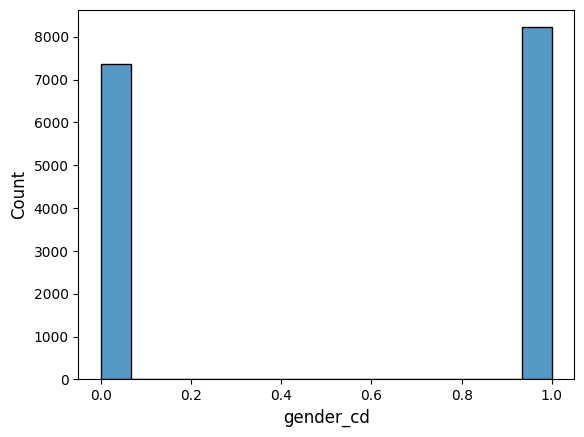

In [143]:
import seaborn as sns

sns.histplot(df['gender_cd'])

In [144]:
df["emp_gender_cd"].isna().sum()

1874

<Axes: xlabel='emp_gender_cd', ylabel='Count'>

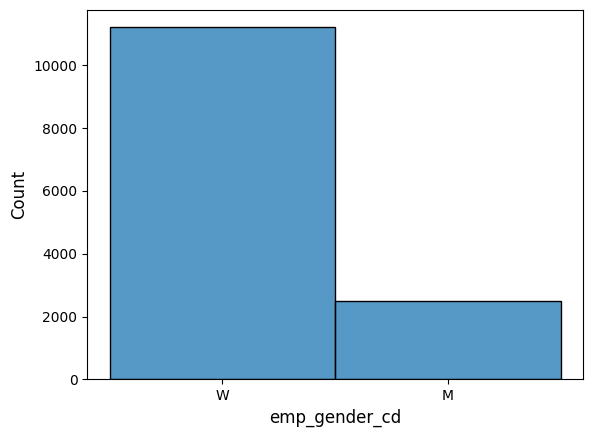

In [145]:
sns.histplot(df["emp_gender_cd"])

In [146]:
data = df.copy()
data["gender_cd"] = data["gender_cd"].replace({0: "W", 1: "M"})

In [147]:
data.groupby(["emp_gender_cd", "gender_cd"])["approval_flag"].mean().reset_index()

,emp_gender_cd,gender_cd,approval_flag
0,M,M,0.108169
1,M,W,0.076401
2,W,M,0.103536
3,W,W,0.094093


In [148]:
df.groupby("approval_flag")["state_talk_time_sec"].mean().reset_index()

,approval_flag,state_talk_time_sec
0,0,56.249715
1,1,148.852502


In [149]:
df.groupby("approval_flag")["age"].mean().reset_index()

,approval_flag,age
0,0,37.885814
1,1,37.243015


In [150]:
df.groupby("approval_flag")["is_holiday"].mean().reset_index()

,approval_flag,is_holiday
0,0,0.097591
1,1,0.114360


In [151]:
# df.groupby("approval_flag")["bundle_nm"].mean().reset_index()

In [152]:
df["region_size"].value_counts()

region_size
No       6162
town     4979
urban    2219
msk      1309
rural     898
Name: count, dtype: int64

In [153]:
df.groupby("region_size")["approval_flag"].mean()

region_size
No       0.086660
msk      0.083270
rural    0.136971
town     0.115686
urban    0.088779
Name: approval_flag, dtype: float64

In [154]:
df["functional_cd"].value_counts()

functional_cd
Preapprove       7933
Afterfilling     1785
Utilization      1389
Cold             1371
Upsell           1124
Meeting           759
Agreement         420
Incoming          213
Reutilization     187
Downsell          185
Activation         87
BAF                62
Autoleads          35
Deposit            10
Prolongation        6
Refinancing         1
Name: count, dtype: int64

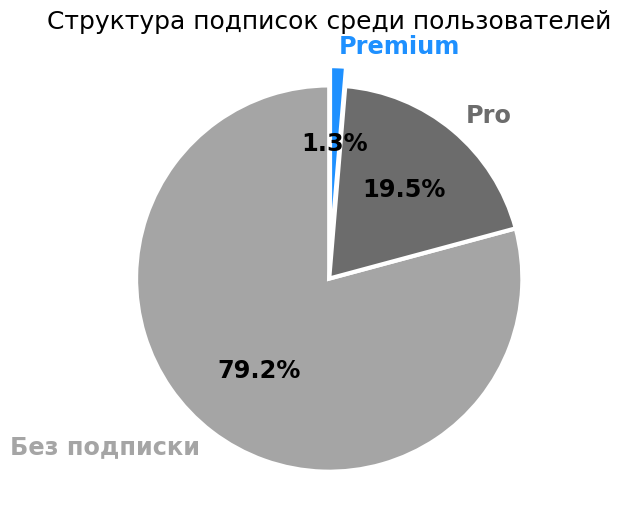

In [160]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(6, 6))

subs = data_preapprove["bundle_nm"].value_counts()
bundle_group_labels = data_preapprove["bundle_nm"].unique()

# Получаем четыре разных серых цвета.
cmap = plt.get_cmap('Greys')
colors = list(cmap(np.linspace(0.45, 0.85, len(subs))))
# Замена на яркий синий для определенного цвета
colors[2] = 'dodgerblue'

explode = (0,) * (len(subs) - 1) + (0.1,)  # Взрываем последний сектор

# Создаем круговую диаграмму
patches, texts, pcts = ax.pie(
    x=subs, labels=bundle_group_labels, autopct='%.1f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=90,
    colors=colors,
    explode=explode)

# Установка цвета подписей
for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())

# Установка черного цвета для процентов и такой же толщины шрифта, как у подписей
for pct in pcts:
    pct.set_color('black')  # Устанавливаем цвет процентов в черный
    pct.set_fontweight('bold')  # Устанавливаем толщину шрифта для процентов

plt.setp(texts, fontweight=600)
ax.set_title('Структура подписок среди пользователей', fontsize=18)
plt.tight_layout()
plt.show()


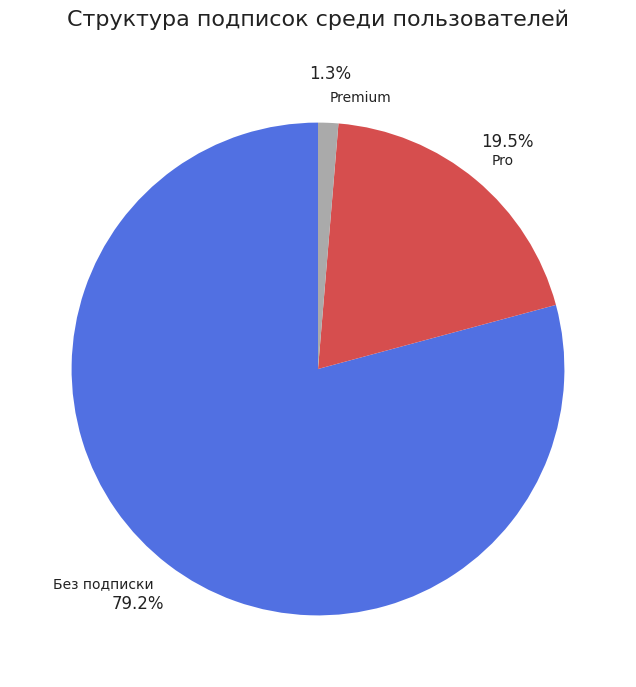

In [185]:
# Customizing our pie chart
colors = ['#5170E2', '#D64E4E', '#aaaaaa']
subs = data_preapprove["bundle_nm"].value_counts()
bundle_group_labels = data_preapprove["bundle_nm"].unique()
font_color = '#222222'

plt.rcParams.update({
'font.size': 12, # Общий размер шрифта для текста
'axes.titlesize': 14, # Размер шрифта для заголовков осей
'axes.labelsize': 12, # Размер шрифта для подписей осей
'xtick.labelsize': 10, # Размер шрифта для меток на оси X
'ytick.labelsize': 10 # Размер шрифта для меток на оси Y
})

plt.figure(figsize=(8, 8))
plt.pie(subs, labels=bundle_group_labels, autopct='%1.1f%%', startangle=90, colors=colors, pctdistance=1.2, radius=1, textprops={'color':font_color})
title = plt.title('Структура подписок среди пользователей', fontsize=16, color=font_color, pad=25)
plt.savefig('pie_chart.png', format='png')
plt.show()
        

In [162]:
# df = df.dropna(subset=["emp_gender_cd"])

In [163]:
# df["emp_gender_cd"].value_counts()

In [164]:
# df["emp_gender_cd"] = df["emp_gender_cd"].fillna("W")

In [165]:
# df["emp_gender_cd"] = df["emp_gender_cd"].replace({"W":0, "M":1})

In [166]:
# df.groupby("approval_flag")["emp_gender_cd"].mean()